1. Describe the data
* The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.
* Number of Instances: 6819
* Number of Attributes: 96

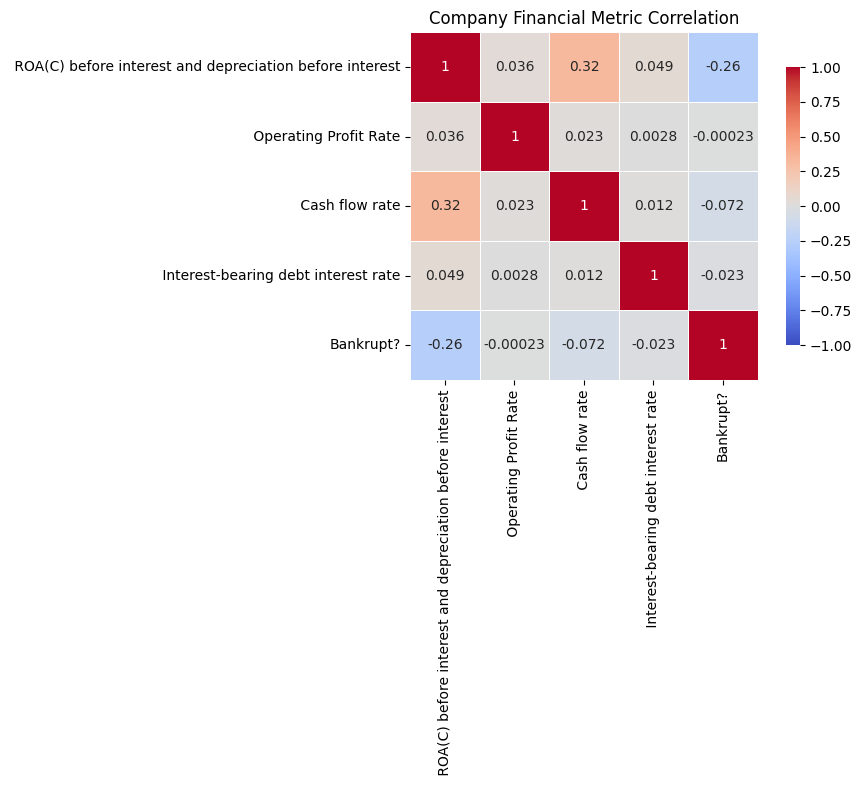

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
#@title Figure 1: Company Financial Metric Correlation Heatmap code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv') #importing the data
# print(data.columns) #gets the column titles, if desired uncomment
columns_of_interest = [' ROA(C) before interest and depreciation before interest',
                       ' Operating Profit Rate',
                       ' Cash flow rate',
                       ' Interest-bearing debt interest rate',
                       'Bankrupt?']

selected_data = data[columns_of_interest] #Create a new DataFrame with only the selected columns
corr = selected_data.corr() #finding the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,           # Display correlation values on the heatmap
            cmap='coolwarm',       # Set a color palette for the heatmap
            linewidths=0.5,        # Add lines between the cells
            vmin=-1, vmax=1,       # Set range for the color bar
            square=True,           # Make cells square-shaped
            cbar_kws={"shrink": 0.8})

plt.title("Company Financial Metric Correlation")
plt.tight_layout()
plt.show()
data.head()

From the heatmap we can see the correlation between various financial metrics of companies and whether a company is bankrupt or not;
* ROA(C) before interest and depreciation: Net income/Total asset
* Operating Profit Rate: Operating Profit/ Total Revenue
* Interest-bearing debt interest rate: Net Interest Expense/Net Interest-Bearing Debt
* Cash flow rate: Operating cash flow/Current liabilities.
* *ROA(C) before interest and depreciation* shows a moderate negative correlation with bankruptcy, about -0.26. This implies that higher returns on assets may lower the likelihood of bankruptcy. Financial distress is often associated with insufficient funds, and improving return on assets could help alleviate this issue to an extent.
* *Operating Profit Rate* and *Interest-bearing debt interest rate* show very weak correlations with bankruptcy, suggesting that they are relatively insignificant factors in directly determining bankruptcy risk.
* *Cash flow rate* also shows a weak negative correlation with bankruptcy (-0.072), meaning that a higher cash flow might reduce risk of bankruptcy, but only slightly.

Overall, based on this correlative heatmap, ROA(C) appears to be the most influential metric in assessing a company's risk of bankruptcy.

Why have we picked these metrics to compare with bankruptcy when our dataset had 96 columns (including the label column)?

A key model for predicting corporate bankruptcy is the Altman Z-Score, which heavily relies on metrics related to profitability and asset returns. While the model utilizes the Earnings Before Interest and Taxes (EBIT) to Total Assets ratio, this is closely aligned with ROA(C) before interest and depreciation. Additionally, the EBIT ratio evaluates a firm's ability to generate profits solely from its operations, which is reflected in our Operating Profit Rate metric. Furthermore, the Altman Z-Score incorporates interest-bearing debt metrics due to their significant impact on profitability and cash flow—both essential for maintaining financial stability within a company or organization.

# Decision Tree Model

In [ ]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

from warnings import simplefilter
simplefilter(action="ignore")

In [ ]:
data = pd.read_csv('data.csv') #Loading the dataset

In [ ]:
if data[' Net Income Flag'].nunique() == 1:
    print("The column has all the same values.")
else:
    print("The column has different values.")

The column has all the same values.


In [ ]:
data.drop(columns=[' Net Income Flag',' Liability-Assets Flag'], inplace= True)
# Since these binary variables has all the same value (=1)
# then we drop since it will not provide an additional value

The target variable is our first column, 'bankrupt?', as we aim to identify which components of a company can predict bankruptcy. This column serves as the label for inducing an initial supervised learning model.

### Training & Validating Decision Tree Model

In [ ]:
data.fillna(data.mean(), inplace=True) # Filling any possible NaN values with mean of column
X = data.drop('Bankrupt?', axis=1) # Dropping the target variable from df
y = data['Bankrupt?'] # Target variable containing values the model will try to predict

We must remove target variable from df and make a seperate set y, which would contain the target variable values that we can use to see how well our model predicts the values

In [ ]:
bankrupt_counts = y.value_counts()
print(bankrupt_counts)

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


Most Companies are not Bankrupt, only 3% of the companies in our dataset are bankrupt.

Now we split data into training, valadation & testing sets.

In [ ]:
# Splitting data, 40% for validation and test, 60% for training, stratify used to help with imbalanced data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)

# Then, split the temporary set into validation and test sets, 20% test, 20% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#@title The code below finds the best hyperparameters for the decision tree algorithm for trying to maximize the F1 score when the company is bankrupt
dtree_ts = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', random_state=42)

# Step 2: Create a dictionary for hyperparameter grid
param_grid = {
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_split': [5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7]
}

# Step 3: Create a custom scorer for F1 score of the positive class
f1_scorer = make_scorer(f1_score, pos_label=1)

# Step 4: Set up the grid search with the custom scorer
grid_search = GridSearchCV(estimator=dtree_ts, param_grid=param_grid,
                           scoring=f1_scorer,  # Use the custom F1 scorer
                           cv=8,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available cores
                           verbose=1)  # Set to 1 for detailed output

# Step 5: Fit the model
grid_search.fit(X_train, y_train)

# Step 6: Output the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation F1 Score for Bankrupt = 1:", best_score)

Fitting 8 folds for each of 180 candidates, totalling 1440 fits
Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best Cross-Validation F1 Score for Bankrupt = 1: 0.3061340422132444


The reason we want to maximize the F1 score for bankrupt companies is that we have an imbalanced dataset, where most companies are not bankrupt. This could lead to a misleading very high accuracy but would result in missing most of the bankrupt companies, as only 3% of the companies are bankrupt. Therefore, we aim to minimize the false labeling of bankrupt companies as not bankrupt, as well as the misclassification of non-bankrupt companies as bankrupt by maximixing F1 score of Bankrupt=1.

In [ ]:
# Building decision tree, balanced weight class to deal with any imbalancement in data
dtree = DecisionTreeClassifier(class_weight= 'balanced', criterion='gini', max_depth=6, min_samples_split=9, min_samples_leaf=4, random_state=42)
# max depth, etc to deal with possible overfitting values choosen to maximize f1 score of bankrupt = 1

# Fit the model using the training set
dtree.fit(X_train, y_train)

# Predict on the validation set, assecing generaliation of the model
y_val_pred = (dtree.predict_proba(X_val)[:, 1] >= 0.93).astype(int)
# .93 threshold decided based on maximizing F1-score for Bankrupt?(=1)

In [ ]:
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Accuracy: 93.26%
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1323
           1       0.24      0.59      0.34        41

    accuracy                           0.93      1364
   macro avg       0.61      0.76      0.65      1364
weighted avg       0.96      0.93      0.95      1364



The model achieved an accuracy of 93.26% on the validation set. It successfully predicted 94% of the non-bankruptcy cases, with 99% of these predictions accurately labeled. However, when predicting bankrupt cases, the model only identified 59% of the instances correctly, with an accuracy of just 24% in labeling them as bankrupt.

A confusion matrix (or, error matrix) is a visualization method for classifier algorithm results. More specifically, it is a table that breaks down the number of ground truth instances of a specific class against the number of predicted class instances.

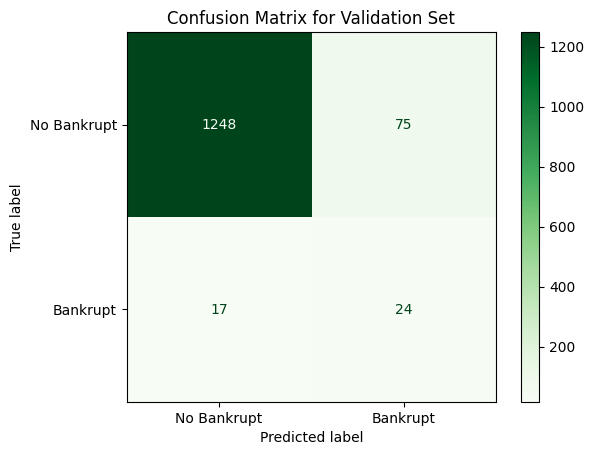

In [ ]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_names = { 'No Bankrupt' : 0, 'Bankrupt' : 1}
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for Validation Set')
plt.show()

### Assessing Decision Tree Model on Test Set

In [ ]:
# Predict on the test set, assecing performance of the model
y_test_pred = (dtree.predict_proba(X_test)[:, 1] >= 0.93).astype(int)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy: 93.77%
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1317
           1       0.32      0.70      0.44        47

    accuracy                           0.94      1364
   macro avg       0.65      0.82      0.70      1364
weighted avg       0.97      0.94      0.95      1364



Testing our model on the test set, we see that the overall accuracy 93.77% in which the model is 44% effective in predicitng bankrupt companies as seen by the f1-score for Bankrupt?(=1).

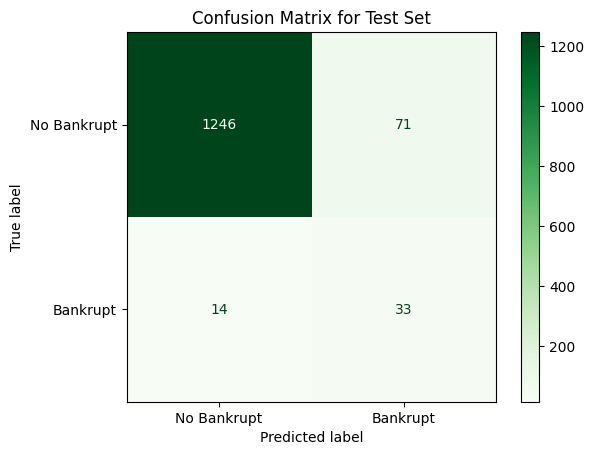

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_names = { 'No Bankrupt' : 0, 'Bankrupt' : 1}
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

Code Below Finds the best hyperparameters for the Random Forest Model

In [ ]:
#@title The code below finds the best hyperparameters for the Random Forest algorithm for trying to maximize the F1 score when the company is bankrupt
param_grid = {
    'n_estimators': [100, 150, 200],          # Number of trees in the forest
    'max_depth': [5, 8, 9, 10],                   # Maximum depth of each tree
    'min_samples_split': [2, 5, 7, 10],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 5, 7, 10]          # Minimum number of samples at each leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight= 'balanced', criterion='gini', random_state=42)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=50,         # Number of parameter settings that are sampled
                                   scoring=f1_scorer, # We will maximize the F1 score for Bankrupt = 1
                                   cv=5,              # 5-fold cross-validation
                                   verbose=2,         # Output progress
                                   n_jobs=-1,         # Use all available cores
                                   random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_depth': 10}


In [ ]:
rf_model = RandomForestClassifier(n_estimators= 200,     # Number of trees in the forest
                                  max_depth= 10,          # Maximum depth of the tree
                                  min_samples_split= 10, # Minimum number of samples required to split a node
                                  min_samples_leaf= 7,   # Minimum number of samples required at each leaf node
                                  class_weight= 'balanced',
                                  criterion= 'gini',
                                  random_state= 42)

Training model and testing for generalization on validation set

In [ ]:
rf_model.fit(X_train, y_train)
# threshold decided after testing different values to maximize F1-score Bankrupt?(=1)
y_pred_val = (rf_model.predict_proba(X_val)[:, 1] >= 0.49).astype(int)

In [ ]:
accuracy_val = accuracy_score(y_val, y_pred_val)
class_report_val = classification_report(y_val, y_pred_val)
print(f"Random Forest Validation Set Accuracy: {accuracy_val * 100:.2f}%")
print("Classification Report on Validation Set:\n", class_report_val)

Random Forest Validation Set Accuracy: 96.33%
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1323
           1       0.42      0.59      0.49        41

    accuracy                           0.96      1364
   macro avg       0.70      0.78      0.74      1364
weighted avg       0.97      0.96      0.97      1364



The model has an accuracy of 96.33%, in which 42% of its bankrupt predictions were actually bankrupt, 59% of the true bankrupt companies were correctly labeled.Overall effectivness in bankrupt(=1) predictions is 49%

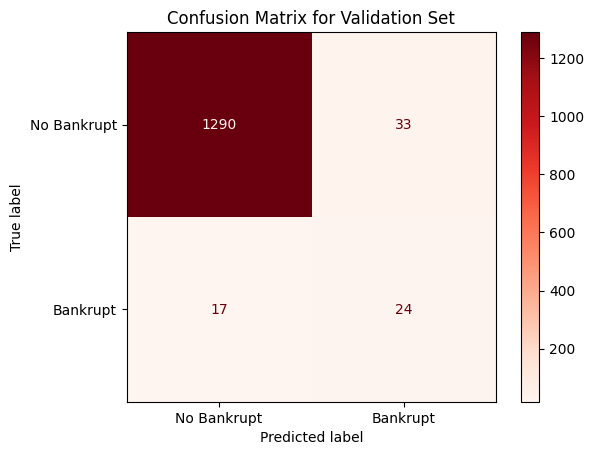

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred_val)
class_names = { 'No Bankrupt' : 0, 'Bankrupt' : 1}
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Validation Set')
plt.show()

Testing model on test set

In [ ]:
y_pred_rf = (rf_model.predict_proba(X_test)[:, 1] >= 0.49).astype(int)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report on Test Set:\n", class_report_rf)

Random Forest Accuracy: 96.48%
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1317
           1       0.49      0.57      0.53        47

    accuracy                           0.96      1364
   macro avg       0.74      0.78      0.76      1364
weighted avg       0.97      0.96      0.97      1364



On the test set results are similar but slighlty better at precision than on the validation set. Overall accuracy of the model is 96.48% and 53% for bankrupt?(=1)

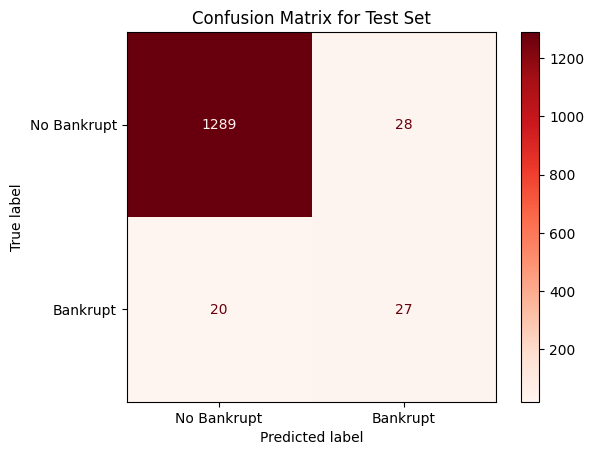

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_names = { 'No Bankrupt' : 0, 'Bankrupt' : 1}
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Lasso Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

For Lasso logistic regression we first have to scale the data with StandardScaler

> Add blockquote



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_val_scaled = scaler.fit_transform(X_val)      # Fit and transform valadation set
X_test_scaled = scaler.transform(X_test)        # Fit and transform test set

C is the inverse of alpha and is used in the model instead of alpha. It has the same effect, with a lower C value corresponding to stronger regularization (C = 0.5 is equivalent to alpha = 2). The value of 0.5 was chosen after testing different options to maximize the F1-score for predicting bankrupt companies (Bankrupt = 1).

In [ ]:
# Class weight to deal with imbalnced data 5x weight on Bankrupt compared to non Bankrupt
# l1 specifies lasso regularization
lasso_log_reg = LogisticRegression(class_weight = {0: 1, 1: 5}, C= .5,
                                   penalty='l1', solver='liblinear', random_state=42)
lasso_log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, class_weight={0: 1, 1: 5}, penalty='l1',
                   random_state=42, solver='liblinear')

.3 was the best threshold to max F1-score for predicting bankrupt companies

In [ ]:
# Predict model on validation set
y_pred_reg = (lasso_log_reg.predict_proba(X_val_scaled)[:, 1] >= .3).astype(int)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_reg)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Valuation Set Classification Report:")
print(classification_report(y_val, y_pred_reg))

Accuracy: 94.57%
Valuation Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1323
           1       0.28      0.51      0.36        41

    accuracy                           0.95      1364
   macro avg       0.63      0.74      0.67      1364
weighted avg       0.96      0.95      0.95      1364



Only 28% of the companies predicted to be bankrupt are actually bankrupt, the model correctly identifies 51% of the actual bankrupt companies.

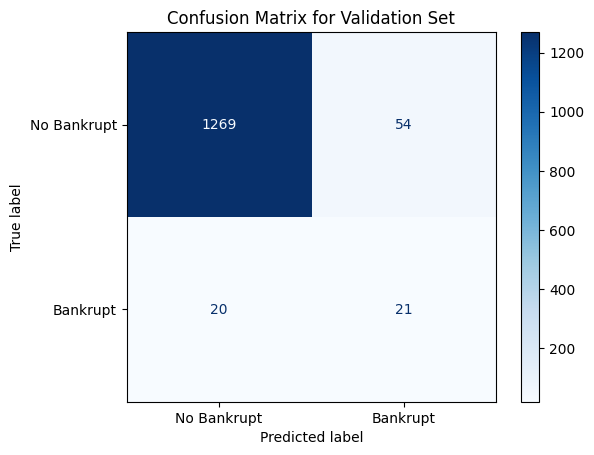

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred_reg)
class_names = { 'No Bankrupt' : 0, 'Bankrupt' : 1}
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Validation Set')
plt.show()

In [ ]:
y_pred_reg_ts = (lasso_log_reg.predict_proba(X_test_scaled)[:, 1] >= .3).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_reg_ts)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_reg_ts))

Accuracy: 94.79%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1317
           1       0.34      0.55      0.42        47

    accuracy                           0.95      1364
   macro avg       0.66      0.76      0.70      1364
weighted avg       0.96      0.95      0.95      1364



Of all the companies predicted to be bankrupt, only 34% were actually bankrupt. The model correctly identifies 55% of the actual bankrupt companies

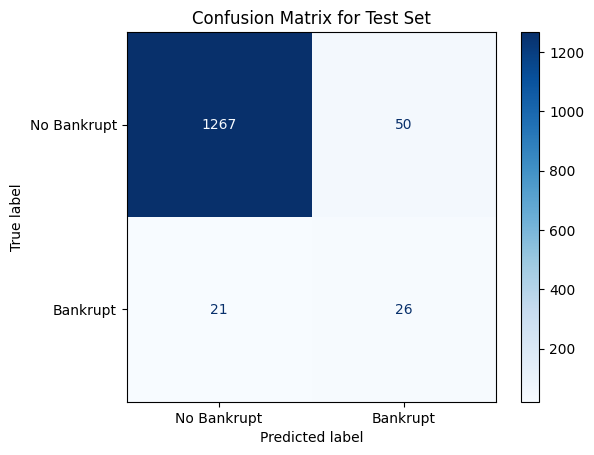

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_reg_ts)
class_names = { 'No Bankrupt' : 0, 'Bankrupt' : 1}
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Comparing the 3 Models

Decision Tree
*   Accuracy: 93.77%
*   Precision (Bankrupt = 1): 0.32
*   Recall (Bankrupt = 1): 0.70
*   F1-Score (Bankrupt = 1): 0.44

Random Forest
*   Accuracy: 96.48%
*   Precision (Bankrupt = 1): 0.49
*   Recall (Bankrupt = 1): 0.57
*   F1-Score (Bankrupt = 1): 0.53

Lasso Logistic Regression
*   Accuracy: 94.79%
*   Precision (Bankrupt = 1): 0.34
*   Recall (Bankrupt = 1): 0.55
*   F1-Score (Bankrupt = 1): 0.42

Overall, the best model was the Random Forest model as it had the highest F1-score of 0.53 for predicting bankrupt companies, along with the highest overall accuracy at 96.48% and highest precision. While the Decision Tree had the highest recall for bankrupt companies at 0.70, its precision was much lower at 0.32. Therefore, the Random Forest model is the best choice, providing the best balance between recall and precision, as well as the highest overall F1-score for bankrupt companies